GSAPP PLA6113 Tuesday February 18th, 2020
# Exploring Urban Data with ML
# Supervised Learning 2
## Linear classifiers (probability models)

#### Contents

* Supervised Learning and Classification
* Linear Classifiers (Probability Models)
    * Naive Bayes Classifier
    * Logistic Regression     
* Urban Example: Applications of machine learning methods to predict readmission and length-of-stay for homeless families: the case of WIN shelters in New York City

# 1. Supervised Learning and Classification

* Classification: subcategory of supervised learning 
* Input-output pairs
* Goal of classification: predict the categorical class labels of new instances based on past observations
<br>

* Example: Predicting whether a neighborhood will be gentrified or not
    * Label ($y$): binary representation of neighborhood gentrification in the past
    * Predictors ($X$): neighborhood characteristics (demogrpahics, socioeconoics, or urban form features)

## 1) Types of classification problems

#### Binary classification
The typical example is e-mail spam detection, which each e-mail is spam → 1 spam; or isn’t → 0.
#### Multi-class classification
Like handwritten character recognition (where classes go from 0 to 9).

![title](image1.png)

    * Note of binary classification: There are 2 classes, red and blue, and 2 features, $x_1$ and $x_2$. The model is able to find the relationship between the features of each data point and its class, and to set a boundary line between them, so when provided with new data, it can estimate the class where it belongs, given its features. In this case, the new data point falls into the blue subspace and, therefore, the model will predict its class to be a blue.

## 2) Types of classification algorithms (solutions)
* Not every classification models will be useful to separate properly different classes from a dataset
* The task of selecting an appropiate algorithm became of paramount importance in classification problems

#### Linear classification
Classes can be separated by a linear decision boundary
Example algorithms: Naive Bayes Classifier, Logistic Regression (we will learn these today)
#### Non-linear classification
Classes can't be separated by a linear decision boundary
Example algorithms: K-nearest neighbors, Kernel Support Vector Machine, Perceptron

![title](image2.png)

# 2. Linear Classifiers (Probability Models)

#### Goal of probabilistic classifier 
* To determine the probability of the features occurring in each class with features $x_0$ through $x_n$ and classes $c_0$ through $c_k$
* To return the most likely class
* For each class, we want to calculate $P(c_i | x_0, …, x_n)$ 
* Example: <br>
Probability that an email containing 'win' and 'lottery' is spam = $P(C_{spam} | x_{win}, x_{lottery})$




# 2-1. Naive Bayes Classifier

* A simple, yet effective and commonly-used, machine learning classifier 
* A probabilistic classifier based on the __Bayesian rule__
* Traditional solution for problems such as spam detection

## 1) Bayesian rule (Bayes' theorem)

* The probability of an event, based on prior knowledge of conditions that might be related to the event
* The probability of an event can be predicted based on the previous observations
* How to predict a probability of class ($c$, target) given predictor ($x$, feature)
\begin{align}
\ P(c|x) = \frac{P(x|c)\cdot P(c)}{P(x)} \\
\end{align}

Meaning, __the probability of class $c$ given predictor $x$__ (posterior proability) can be estimated based on (1) $P(x|c)$ (likelihood), (2) $P(c)$ (class prior probability), and (3) $P(x)$ (predictor prior probability) because <br>

The probability of a data point is associated with class $c$ and predictor $x$ is expressed as <br>

\begin{align}
\ P(c\&x) = P(c) \cdot P(x|c) = P(x) \cdot P(c|x)\\
\end{align}

## Play with the spam classification example

* Consider some data about content of several e-mails classified as Spam and non-spam

|  Cruise | Lottery | Win | Spam |
|-----|-------------|---------|-------|
|  1 | 1 | 1 | 1|
| 1 | 0 | 1 | 1 |
| 0 | 1 | 0 | 1 |
| 0 | 0 | 1 | 0 |
| 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 0 |

* Now if we receive a email containing "Cruise", is this spam or not?
\begin{align}
\ P(c_{spam}|x_{cruise}) = \frac{2}{3} = \frac{P(x_{cruise}|c_{spam})\cdot P(c_{spam})}{P(x_{cruise})} = \frac{\frac{2}{3} \cdot \frac{1}{2}}{\frac{1}{2}} = \frac{2}{3}\\
\end{align}

* Now if we receive a email containing "Cruise" and "Lottery", is this spam or not?
\begin{align}
\ P(c_{spam}|x_{cruise}x_{lottery}) = P(x_{cruise}|c_{spam})\cdot P(x_{lottery}|c_{spam}) \cdot P(!x_{win}|c_{spam}) \cdot P(c_{spam}) = \frac{2}{3} \cdot \frac{2}{3} \cdot (1-\frac{2}{3}) \cdot \frac{1}{2} = \frac{2}{27}\\
\end{align}

\begin{align}
\ P(c_{nonspam}|x_{cruise}x_{lottery}) = P(x_{cruise}|c_{nonspam})\cdot P(x_{lottery}|c_{nonspam}) \cdot P(!x_{win}|c_{nonspam}) \cdot P(c_{nonspam}) = \frac{1}{3} \cdot \frac{1}{3} \cdot (1-\frac{1}{3}) \cdot \frac{1}{2} = \frac{1}{27}\\
\end{align}

* Conclusion: the probability of spam is 2/27, higher than the probability of non-spam (1/27), so the email with "Cruise" and "Lottery" is classified as spam.

\begin{align}
\ P(c_{spam}|x_{cruise}x_{lottery}) > \ P(c_{nonspam}|x_{cruise}x_{lottery})
\end{align}

## 2) Definition of Navie Bayes Classifier
Predict a proability that a new data point with predictors $x_0, x_1,…x_n$ would be class $i$ 

\begin{align}
\ P(c_i|x_0,x_1,…,x_n) = \frac{P(x_0,x_1,...x_n|c_i)\cdot P(c_i)}{P(x_0,x_1,…,x_n)} =  P(c_i) \prod_{j=1}^{n}P(x_j|c_i)\\
\end{align}

__Important assumption: Predictors $x_0$ through $x_n$ are conditionally independent given $c_i$__

* This assumption allows that $P(x_0,x_1 …, x_n | c_i)$ = $P(x_0 | c_i) \cdot P(x_1 | c_i) …  P(x_n | c_i)$. 
* This assumption is most likely not true in real-world — hence the name naive Bayes classifier, but the classifier nonetheless performs well in most situations

## 3) What are the Pros and Cons of Naive Bayes?

#### Pros
* Simple, quick, and accurate. It is easy and fast to predict class of test data set. It also perform well in multi class prediction (less computation cost). The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature.
* When assumption of independence holds, it performs better compare to other models like logistic regression.
* It performs well even though you have relatively small training data.
* It performs well in case of categorical (discrete) input variables compared to numerical variable(s).

#### Cons
* The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
* If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.

## 4) Types of Naive Bayes Classifiers
Depending on what distribution your features follow
(https://scikit-learn.org/stable/modules/naive_bayes.html#bernoulli-naive-bayes)

__Bernoulli Naive Bayes Classifier__
* The binomial model is useful if your feature vectors are binary (i.e. zeros and ones) 
* Example: a ‘bag of words’ model for a spam classification purpose where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively


__Multinomial Naive Bayes Classifier__
* It is used for discrete counts
* Example: a document classification based on “count how often word occurs in the document”


__Gaussian Naive Bayes Classifier__ _*** you will mostly use this algorithms with urban data_
* It assumes that continuous features follow a normal distribution
* Gaussian Probability Density Function (PDF) is used based on the normal distribution curve
* Example: a at-risk building classification based on continuous predictors such as built year, building size, boiler capacity, etc.
    
<div>
<img src="image3.png" width="800"/>
</div>

## Python example: Predicting type of the building by using Naive Bayes

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Gaussian Naive Bayes module (GaussianNB) from scikit-learn

In [ ]:
# We will use Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

#### Load the sample data

In [ ]:
# First load the sample and 
data = pd.read_csv("../../data/NYC_RE_sample.csv")
data.head()

#### Split data randomly into the training (75%) and test (25%) set

In [ ]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

# Check the number of samples
print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

#### Train Gaussian Naive Bayes Classifier
    YOUR_MODEL_NAME = GaussianNB().fit(X_train, y_train)
    

In [ ]:
clf = GaussianNB().fit(X_train, y_train)

#### Accuracy of training model
    YOUR_MODEL_NAME.score(X_Train, y_train)

In [ ]:
print ("Accuracy: ", clf.score(X_train, y_train))

#### High prediction accuracy. Let's apply to the test data
You are now using your model trained previously based on your train data to predict class of your new data points (test data).

    Probability of each class = YOUR_MODEL_NAME.predict_proba(X_test)
    Classification prediction = YOUR_MODEL_NAME.predict(X_test)

In [ ]:
# Probability that a new data point will be assigned to either class "1" of class "2"
y_pred_test_prob = clf.predict_proba(X_test)

print (y_pred_test_prob.round(3))

In [ ]:
# Predict class of test data
y_pred_test = clf.predict(X_test)

print (y_pred_test)

In [ ]:
# Compare to the prediction and the actual y_test to confirm the model performance
print ("Prediction:", y_test.tolist())
print ("Actual values:", y_pred_test.tolist())

# Check the number of misclassified data points
print("Number of mislabeled points out of a total %d points : %d" %(len(X_test), (y_test != y_pred_test).sum()))

In [ ]:
# Prediction score
print ("Accuracy (calculated from sklearn function):", clf.score(X_test, y_test))
print ("Accuracy (calcualted manually): %f " %(100.0*sum(y_pred_test==y_test)/len(y_test)),"%")

#### Now you can predict a building type of a completely new data point
* 2,600 sqft - gross floor area
* 1,300 sqft - land area
* 2015 - built year
* $850,000 - property price

In [ ]:
print ("Probability:",clf.predict_proba([[2600, 1300, 2015, 850000]]))
print ("Class:",clf.predict([[2600, 1300, 2015, 850000]]))

# 2-2. Logistic Regression
* Linear classifier (a bianry representation)
* Works reasonably well even when some of the variables are slightly correlated
* One of the traditional statistical linear models - for the purpose indentifying influencing feature 
* We focus on ML framework, meaning we need "prediction" part as well as story telling

![title](image6.png)

## 1) Definition of Logistic Regression
* It assumes a parametric form for the distribution $P(y|X)$, then  directly  estimates  its  parameters  from  the  training  data
* The parametric model assumed by Logistic Regression in the case where $y$ is boolean (binary representation) is:

\begin{align}
\ P(y=1|X) = \frac{1}{1+exp(\beta_0 + \sum_{i=1}^n \beta_i X_i)} \\
\\
P(y=0|X) = \frac{exp(\beta_0 + \sum_{i=1}^n \beta_i X_i)}{1+exp(\beta_0 + \sum_{i=1}^n \beta_i X_i)} \\
\end{align}

* Based on the sigmoid (logit) function
![title](image4.png)

## 2) Mathematical Expression
* Logistic Regression can be expressed as:
\begin{align}
Logit(y) = \log(\frac{P(y=1|X)}{1-P(y=1|X)}) = \log(\frac{P(y=1|X)}{P(y=0|X)}) = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n
\end{align}

\begin{align}
P(y=1|X) = \frac{exp(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)}{1+exp(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)}
\end{align}

* We call the term in the $log()$ function “odds” - probability of event divided by probability of no event (which describes the ratio of success to ratio of failure)
* As converting $y$ to $Logit(y)$ or log odds($y$), the folmula is now similar to the OLS
* Find the best fitted line to predict $Logit(y)$
* Instead of the slope coefficients ($\beta_i$) being the rate of change in $y$ (the dependent variables) as $x_i$ changes like OLS model, now the slope coefficient is interpreted as the rate of change in the "log odds" as $x_i$ changes.
* Increasing $x_i$ by 1 increases the log-odds by $\beta_i$. So if $x_i$ increases by 1, the odds that $y$ = 1 increase by a factor of $exp^{\beta_{i}}$

#### Example: if you have a logistic regression model to predict vip customer group (1 or 0) of customers based on their age
    
\begin{align}
Logit(p) = log(\frac{p}{1-p}) = \beta_0 + \beta_{age} \cdot x_{age}    
\end{align}

\begin{align}
log(\frac{p}{1-p})(x_{age} = 30) = \beta_0 + \beta_{age} \cdot 30    
\end{align}

\begin{align}
log(\frac{p}{1-p})(x_{age} = 31) = \beta_0 + \beta_{age} \cdot 31    
\end{align}

Taking the difference of the two equations, we have the following:
\begin{align}
log(\frac{p}{1-p})(x_{age} = 31) - log(\frac{p}{1-p})(x_{age} = 30) = \beta_{age}   
\end{align}

We can say now that the coefficient ($\beta_{age}$) for age is the difference in the log odds.  In other words, for a one-unit increase in the customer age, the expected change in log odds is $\beta_{age}$.

If we exponentiate both sides of our last equation, we have the following:
\begin{align}
exp^{log(\frac{p}{1-p})(x_{age} = 31) - log(\frac{p}{1-p})(x_{age} = 30)} = \frac{exp^{log(\frac{p}{1-p})(x_{age} = 31)}}{exp^{log(\frac{p}{1-p})(x_{age} = 30)}} = \frac{odds(x_{age} = 31)}{odds(x_{age} = 30)} =  exp^{\beta_{age}}   
\end{align}

#### Interpretation
So we can say for a one-unit increase in age, we expect to see about $exp^{\beta_{age}}$ times increase in the odds of being in an customer class 1 (vip group). For example, if $exp^{\beta_{age}}$ is 1.17, then we can say one-unit increase in age, it is associated with 17% more of being in the vip customer group.

## 3) What are the Pros and Cons of Logistic Regression?
#### Pros
* Efficient! It does not require too many computational resources
* Less bias
* It works reasonably well even when some of the variables are slightly correlated (compared to Naive Bayes)
* Interpretable coefficients are provided

#### Cons
* It can’t solve non-linear problems with logistic regression since it’s decision surface is linear
* It requires relatively large data (compared to Naive Bayes)
* It does work better when you remove attributes that are unrelated to the target variable
* Feature Engineering is requred for the model performance
* Imbalanced data*** (What if you have 9990 class 1 and only 10 class 0?)

## 4) Model Evaluation Metrics for Binary Classification

### Confusion matrix
![title](image7.png)

__Accuracy__<br>
Fraction of correctly classified samples

__Precision__<br>
Fraction of relevant instances among the retrieved instances

__Sensitivity (Recall)__<br>
Fraction of the total amount of relevant instances that were actually retrieved

__Specificity__<br>
Proportion of actual negatives that are correctly identified as such

__Keep the end goal in mind!__<br>
We are usually intersted no just in making accurate predictions, but in using these predictions as part of larger decision making process.

__Handle imbalanced data__<br>
What is we have a dataset with 100 samples are class 1 and 9900 samples are class 0 and have a confusion matrix like this:
![title](image8.png)

__Over-sampling or under-sampling methods__<br>
* Random Oversampling: Randomly duplicate examples in the minority class
* Random Undersampling: Randomly delete examples in the majority class
* SMOTE (Synthetic Minority Oversampling Technique): It uses a nearest neighbors algorithm to generate new and synthetic data


### ROC curve (Receiver Operating Characteristic) and AUC (Area Under The Curve)
* The most important evaluation metrics for checking any classification model’s performance
* A performance measurement for classification problem at various thresholds settings
* The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis
* TPR (True positive rate) = Sensitivity or Recall = TP / (TP+FN)
* FPR (False positive rate) = 1 - Specificity = FP / (TN+FP)

__Ideal case__<br>
When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.
![title](image9.png)

__Reasonable case__<br>
When two distributions overlap, we introduce type 1 and type 2 error. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is 70% chance that model will be able to distinguish between positive class and negative class.
![title](image10.png)

__The worst case__ <br>
The model has no discrimination capacity to distinguish between positive class and negative class.
![title](image11.png)

## Python example: Predicting neighborhoods' 311 reporting behavior by using Logistic Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

Now you will use the dataset about 311 reporting behavior and socioeconomic characteristics. This dataset is aggregated at the Census Block Group (CBG) level and the followings are the description of the columns.

* target (y)    
    * Target class 1: Neighborhoods over-reporting local problems
    * Target class 0: Neighborhoods under-reporting local problems
* feamale_r: % of female population
* elederly_r: % of population older than 70
* black_r: % of black population
* non_eng_spanish_r: % of limited English speaker using Spanish
* non_eng_asian_5: % of limited English speaker using Asian languages
* hh_kid_r: % of housholds with kids under 18
* edu_high_r: % of population with at least Bachelor's degree
* unemployed_r: Unemployment rate
* med_rent: Median rent (USD)
* longercommute_r: % of commuters taking more than 45 minutes
* nonprofit_r: #of nonprofit organizaiton per 1000 people
* meanvt_rat: voter turn out

#### Import modules

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix # for confusion matrix
import sklearn.metrics as metrics # for ROC curve

#### Load the sample data and split data randomly into the training (75%) and test (25%) set

In [3]:
# First load the sample and 
data = pd.read_csv("../../data/NYC_CBG_311_reporting.csv")
data.head()

,CBG_ID,female_r,elderly_r,black_r,non_eng_spanish_r,non_eng_asian_r,hh_kid_r,edu_high_r,unemployed_r,med_rent,longercommute_r,nonprofit_r,meanvt_rat,target
0,1500000US360050004003,0.474664,0.074786,0.421856,0.049038,0.0,0.610577,0.287162,0.064192,1224.0,0.692806,0.0,0.273543,0.0
1,1500000US360050016001,0.578753,0.038874,0.441354,0.219207,0.0,0.703549,0.127370,0.075724,948.0,0.424552,0.0,0.220155,0.0
2,1500000US360050016003,0.632696,0.273885,0.447983,0.138983,0.0,0.071186,0.179724,0.000000,629.0,0.563536,0.0,0.136675,1.0
3,1500000US360050016004,0.513636,0.192857,0.253896,0.156812,0.0,0.874036,0.049645,0.014682,1150.0,0.290249,0.0,0.236928,0.0
4,1500000US360050025001,0.450287,0.035373,0.100382,0.254438,0.0,1.068047,0.085217,0.013139,951.0,0.494432,0.0,0.128975,1.0


#### Let's use 7 predictors at this point.

In [4]:
data = data[['female_r', 'elderly_r', 'black_r', 'non_eng_spanish_r', 'non_eng_asian_r', 'hh_kid_r', 'edu_high_r', 'target']]

In [5]:
data.head()

,female_r,elderly_r,black_r,non_eng_spanish_r,non_eng_asian_r,hh_kid_r,edu_high_r,target
0,0.474664,0.074786,0.421856,0.049038,0.0,0.610577,0.287162,0.0
1,0.578753,0.038874,0.441354,0.219207,0.0,0.703549,0.127370,0.0
2,0.632696,0.273885,0.447983,0.138983,0.0,0.071186,0.179724,1.0
3,0.513636,0.192857,0.253896,0.156812,0.0,0.874036,0.049645,0.0
4,0.450287,0.035373,0.100382,0.254438,0.0,1.068047,0.085217,1.0


In [6]:
y = data.iloc[:,-1]
X = data.iloc[:,0:-1]

# Split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

# Check the number of samples
print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 2098
Train sample (y): 2098
Test sample (X): 700
Test sample (y): 700


#### Train Logistic Regression

    YOUR_MODEL_NAME = LogisticRegression()

In [7]:
model = LogisticRegression().fit(X_train, y_train)

#### Accuracy of training model

    YOUR_MODEL_NAEM.score(X_train, y_train)

In [8]:
print ("Accuracy:",round(model.score(X_train, y_train),3))

Accuracy: 0.744


#### Regression coefficietns and odds ratio

    Regression coefficients (log odds) = YOUR_MODEL_NAME.coef_
    Odds ratio = np.exp(Regression coefficients) = np.exp(YOUR_MODEL_NAME.coef_)

In [9]:
parameters = model.coef_
odds_ratio = np.exp(parameters)
print (data.columns.tolist()[:-1])
print (parameters)
print (odds_ratio)

['female_r', 'elderly_r', 'black_r', 'non_eng_spanish_r', 'non_eng_asian_r', 'hh_kid_r', 'edu_high_r']
[[ 0.21943338 -3.13653645  1.65125112  2.40413685 -2.41611006  0.03152629
  -3.10481683]]
[[ 1.24537088  0.04343297  5.21349847 11.06887211  0.08926819  1.0320285
   0.04483273]]


In [10]:
para_results = pd.DataFrame()
para_results['feature'] = data.columns.tolist()[:-1]
para_results['odds_ratio'] = odds_ratio[0]
para_results

,feature,odds_ratio
0,female_r,1.245371
1,elderly_r,0.043433
2,black_r,5.213498
3,non_eng_spanish_r,11.068872
4,non_eng_asian_r,0.089268
5,hh_kid_r,1.032029
6,edu_high_r,0.044833


#### Checking accuracy is not enough to evaluate your model performance, especially for the binary classification case!
#### Let's check a confusion matrix

    Confusion matrix = confusion_matrix(y_trian, y_pred_train)

In [11]:
# First, predicted y based on the train dataset is computed
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)
print (y_prob[:10])
print (y_pred_train.tolist()[:10])
print (y_train.tolist()[:10])

[[0.703346   0.296654  ]
 [0.68620446 0.31379554]
 [0.19463164 0.80536836]
 [0.44157663 0.55842337]
 [0.6525762  0.3474238 ]
 [0.21899599 0.78100401]
 [0.24789039 0.75210961]
 [0.45784185 0.54215815]
 [0.727932   0.272068  ]
 [0.46879025 0.53120975]]
[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]


In [12]:
# Confusion matrix
# [[TN, FP]
#  [FN, TP]]
confusion = confusion_matrix(y_train,y_pred_train)
print (confusion)

[[961 265]
 [272 600]]


#### Based on the confusion matrix, we can calculate 1) accuracy, 2) recall, 3) precision, and 4) specificity

In [13]:
# Confusion matrix
# [[TN, FP]
#  [FN, TP]]

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

Accuracy: 0.7440419447092469
Recall: 0.6880733944954128
Precision: 0.6936416184971098
Specificity: 0.7838499184339315


#### Another model evaluation metric - ROC curve and AUC

    Firstly, you need to compute probability that a data point is assigned as either class 1 or class 2
    probability = YOUR_MODEL_NAME.predict_proba(X_train)

#### Calculate FPR (False Positive Rate) and TPR (True Positive Rate) to create a ROC curve
    metrics.roc_curve() function provides FPR, TPR, and threshold
    metrics.auc() provides AUC (area under curve)

In [17]:
y_prob[:5]

array([[0.703346  , 0.296654  ],
       [0.68620446, 0.31379554],
       [0.19463164, 0.80536836],
       [0.44157663, 0.55842337],
       [0.6525762 , 0.3474238 ]])

In [18]:
preds = y_prob[:,1]  # we usually take the probability of class 1
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)
print (roc_auc)

0.8039355628058729


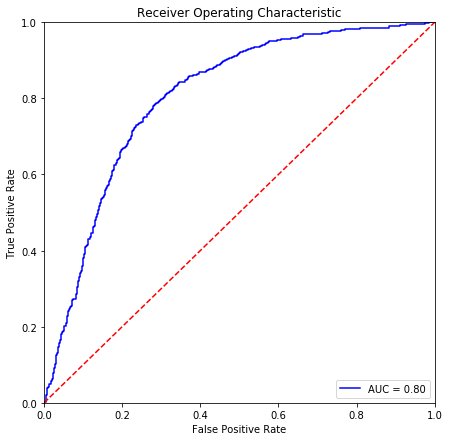

In [19]:
# Let's create ROC curve with AUC score
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) # Main part of plot
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

####  Let's apply to the test data

In [20]:
y_pred_test = model.predict(X_test)

# Confusion matrix
# [[TN, FP]
#  [FN, TP]]
confusion = confusion_matrix(y_test,y_pred_test)

print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

[[317  96]
 [ 87 200]]
Accuracy: 0.739
Recall: 0.697
Precision: 0.676
Specificity: 0.768


### Conclusion: <br>
__Although the prediction accuracy is not perfect, but we can reasonably predict whether a neighborhood over-report of under-report about their local problems through 311 system, using logistic regression based on neighborhood demogarphics and socioeconomics!__

__Please think about how to use ML framework for urban planning context.__

# 3. Urban Example
## Applications of machine learning methods to predict readmission and length-of-stay for homeless families: the case of WIN shelters in New York City

https://www.researchgate.net/profile/Constantine_Kontokosta/publication/322848763_Applications_of_Machine_Learning_Methods_to_Predict_Readmission_and_Length-of-Stay_for_Homeless_Families_The_Case_of_Win_Shelters_in_New_York_City/links/5ab96597a6fdcc46d3b9d532/Applications-of-Machine-Learning-Methods-to-Predict-Readmission-and-Length-of-Stay-for-Homeless-Families-The-Case-of-Win-Shelters-in-New-York-City.pdf